In [1]:
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Here n_components correspond to number of states in the hidden
# variables
hmm_model_gaussian = GaussianHMM(n_components=3, covariance_type='full')

In [4]:
# Transition probability as specified above
A = np.array([[0.2, 0.6, 0.2],
[0.4, 0.3, 0.3],
[0.05, 0.05, 0.9]])

# Set transition probability matrix
hmm_model_gaussian.transmat_ = A

In [5]:
# Define and set the intial state probability
initial_state_prob = np.array([0.1, 0.4, 0.5])
hmm_model_gaussian.startprob_ = initial_state_prob

In [6]:
# As we want to have a 2-D gaussian distribution the mean has to
# be in the shape of (n_components, 2)
mean = np.array([[0.0, 0.0],
[0.0, 10.0],
[10.0, 0.0]])

hmm_model_gaussian.means_ = mean
                

In [8]:
# As emission probability is a 2-D gaussian distribution, thus
# covariance matrix for each state would be a 2-D matrix, thus
# overall the covariance matrix for all the states would be in the 
# form of (n_components, 2, 2)
covariance = 0.5 * np.tile(np.identity(2), (3, 1, 1))
hmm_model_gaussian.covars_ = covariance


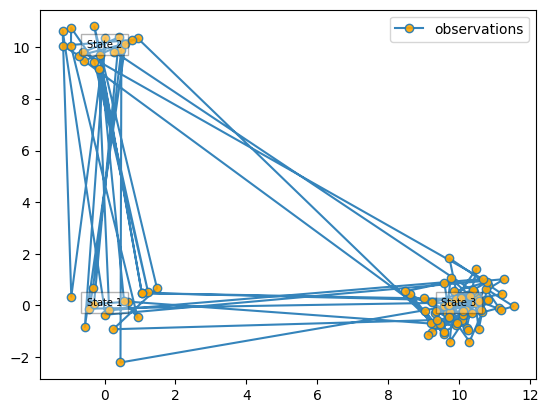

In [24]:
# model.sample returns both observations as well as hidden states
# the first return argument being the observation and the second
# being the hidden states
Z, X = hmm_model_gaussian.sample(100)

plt.plot(Z[:, 0], Z[:, 1], "-o", label="observations", ms=6, mfc="orange", alpha=0.9)

for i, m in enumerate(mean):
    plt.text(m[0], m[1], 'State %i' % (i + 1), size=7, horizontalalignment='center', bbox=dict(alpha=0.3, facecolor='w'))

plt.legend(loc='best')
plt.show()